### This is a Notebook!  WOW!

This is straight-up text!

Here's an integral: $\int_0^5 x^2 dx$

First, import libraries and use matplotlib magic.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def init(x, x0, sig):
    return np.exp(-(x-x0)**2 / (2*sig**2))

a = 0.0
b = 2.0
Nx = 400
dx = (b-a) / (Nx-1)
x = np.linspace(a, b, Nx)


x0 = 0.5
sig = 0.1
u0 = init(x, x0, sig)

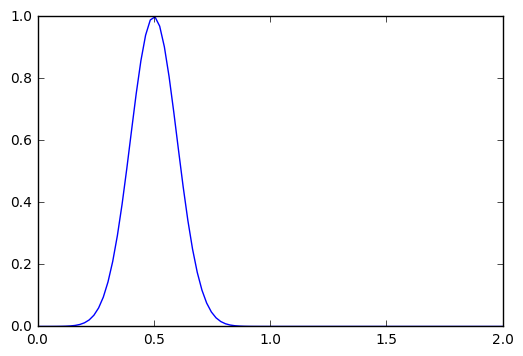

In [10]:
fig, ax = plt.subplots(1,1)
ax.plot(x, u0)

In [20]:
c = 1.0

def ftcs(u, c, dx, dt):
    u1 = u.copy()
    
    #for j in range(1,len(u)-1):
    #    u1[j] += -c*dt/(2*dx) * (u[j+1] - u[j-1])
        
    u1[1:-1] += -c*dt/(2*dx) * (u[2:] - u[:-2])
        
    return u1
    
def upwind(u, c, dx, dt):
    u1 = u.copy()
    
    u1[1:-1] += -c*dt/(dx) * (u[1:-1] - u[:-2])
        
    return u1
    

dx:   0.00501253
c*dt: 0.00333333


(-1, 2)

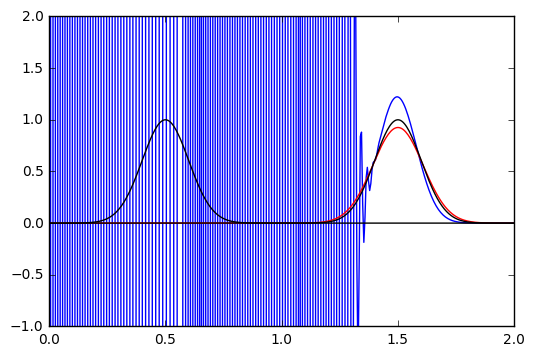

In [34]:
Nt = 300
T = 1.0
dt = T/Nt

print("dx:   {0:g}".format(dx))
print("c*dt: {0:g}".format(c*dt))

uT = init(x-c*T, x0, sig)
uFTCS = u0.copy()
uUW = u0.copy()
for n in range(Nt):
    uFTCS = ftcs(uFTCS, c, dx, dt)
    uUW = upwind(uUW, c, dx, dt)
    
fig2, ax2 = plt.subplots(1,1)
ax2.plot(x, uFTCS, 'b')
ax2.plot(x, uUW, 'r')
ax2.plot(x, u0, 'k')
ax2.plot(x, uT, 'k')
ax2.set_ylim(-1,2)
